# Objective of Analysis
The main aim of this analysis is to carry out an EDA that could help understand amazon sales dataset and provide valuable insights which could aid informed decision making, improve product offering and enhance customer experience.  

# Goals of Analysis
## Key tasks
1. Understand product performance by carrying out correlation analysis to evaluate strength and direction of relationship between quantitaive variables, analysing product rating and identify the most and least rated product that could help recognize areas of improvement or promotion.
2. Explore product ratings and discounts across different categories to identify high performing categories and compare average ratings and discounts across categories.
3. Conduct sentiment analysis on review titles and reviews to understand overall sentiment of users that could help identify common themes or issues for every category helping in their improvement.

## Key recommendations
Provide top recommendations that would include actionable insights which could be leveraged for strategic decision-making, marketing strategies, and overall product improvement on the Amazon platform.






# Dataset Used
/kaggle/input/amazon-sales-dataset

# Data Overview
* Data contains information regarding 1465 products that are listed on the official webiste of amazon.
* Prices mentioned in the data are INR.
* Ratings mentioned in the data are out of five wth five being maximum and zero being minimum possible.

In [1]:
# Importing R libraries to be used for analysis
library(tidyverse)
library(dplyr)
library(stringr)
library(tm)
library(SnowballC)
library(tidytext)
library(ggpmisc)
library(gplots)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content


Loading required package: ggpp


Attaching package: ‘ggpp’


The following object is masked from ‘package:NLP’:

    annotate


The following object is masked from ‘package:ggplot2’:

    annotate


Registered S3 method overwritten by 'ggpmisc':
  method                  from   

In [2]:
# downloading data
amazon_sales_data<- read.csv("/kaggle/input/amazon-sales-dataset/amazon.csv")

In [3]:
# checking the structure of data and taking a glimpse of it
str(amazon_sales_data)
head(amazon_sales_data)

'data.frame':	1465 obs. of  16 variables:
 $ product_id         : chr  "B07JW9H4J1" "B098NS6PVG" "B096MSW6CT" "B08HDJ86NZ" ...
 $ product_name       : chr  "Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, "| __truncated__ "Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other "| __truncated__ "Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air"| __truncated__ "boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging "| __truncated__ ...
 $ category           : chr  "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripher

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
2,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay 

# Checking missing data

In [4]:
# checking for missing values from amazon_sales_data
missing_values<- sum(is.na(amazon_sales_data))
paste("number of missing values",missing_values)

[1] "number of missing values 0"

# Converting data type for some of the columns

In [5]:
# converting columns discounted_price, actual_price, discount_percentage and rating in amazon_sales_data to numeric
amazon_sales_data$discounted_price <- sub("₹", "", amazon_sales_data$discounted_price)
amazon_sales_data$discounted_price <- as.numeric(sub(",", "", amazon_sales_data$discounted_price))
amazon_sales_data$actual_price <- sub("₹", "", amazon_sales_data$actual_price)
amazon_sales_data$actual_price <- sub(",", "", amazon_sales_data$actual_price)
amazon_sales_data$actual_price <- as.numeric(sub(",", "", amazon_sales_data$actual_price))
amazon_sales_data$discount_percentage<- as.numeric(sub("%","",amazon_sales_data$discount_percentage))
amazon_sales_data$rating<- as.numeric(amazon_sales_data$rating)
amazon_sales_data$rating_count<- sub(",", "", amazon_sales_data$rating_count)
amazon_sales_data$rating_count <- as.numeric(sub(",", "", amazon_sales_data$rating_count))

str(amazon_sales_data)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


'data.frame':	1465 obs. of  16 variables:
 $ product_id         : chr  "B07JW9H4J1" "B098NS6PVG" "B096MSW6CT" "B08HDJ86NZ" ...
 $ product_name       : chr  "Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, "| __truncated__ "Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other "| __truncated__ "Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air"| __truncated__ "boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging "| __truncated__ ...
 $ category           : chr  "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripher

# Checking for NAs in data added due to change in data type

In [6]:
# looking for data with NAs
NA_data<- amazon_sales_data %>%
filter(is.na(rating)| is.na(discount_percentage)| is.na(actual_price)| is.na(discounted_price)| is.na(rating_count))
print(NA_data)

  product_id
1 B0B94JPY2N
2 B0BQRJ3C47
3 B08L12N5H1
                                                                                                                                                                                   product_name
1                                                            Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)
2 REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
3                                   Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)
                                                                                               category
1                     Computers&Accessories|Accessories&Peripherals|Cables&A

In [7]:
# checking for similar product_id to fill the missing value
missing_value<- amazon_sales_data %>%
filter(product_id == "B08L12N5H1"| product_id == "B0B94JPY2N"| product_id == "B0BQRJ3C47")
print(missing_value)

  product_id
1 B0B94JPY2N
2 B0BQRJ3C47
3 B08L12N5H1
                                                                                                                                                                                   product_name
1                                                            Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)
2 REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
3                                   Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)
                                                                                               category
1                     Computers&Accessories|Accessories&Peripherals|Cables&A

In [8]:
# checking for similar product name to fill the missing value as similar product id is not present
missing_value1<- amazon_sales_data %>%
filter(product_name == "Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)"|
      product_name == "Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)"|
      product_name == "REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White")
print(missing_value1)

  product_id
1 B0B94JPY2N
2 B0BQRJ3C47
3 B08L12N5H1
                                                                                                                                                                                   product_name
1                                                            Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)
2 REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
3                                   Eureka Forbes car Vac 100 Watts Powerful Suction Vacuum Cleaner with Washable HEPA Filter, 3 Accessories,Compact,Light Weight & Easy to use (Black and Red)
                                                                                               category
1                     Computers&Accessories|Accessories&Peripherals|Cables&A

**Since similar product is not available in the data I used the product links provided in the data to check its rating and rating counts from official amazon website, while checking product link for product id B0BQRJ3C47, link is not functioning so we could not update the missing data for it.**

In [9]:
# adding missing value of rating using the product link provided
amazon_sales_data$rating<- ifelse(is.na(amazon_sales_data$rating),4.0,amazon_sales_data$rating)
amazon_sales_data$rating_count <- ifelse(
  is.na(amazon_sales_data$rating_count) & amazon_sales_data$product_id == "B0B94JPY2N",
  48,amazon_sales_data$rating_count)

# Cross checking data for any other NAs
NA_data<- amazon_sales_data %>%
filter(is.na(rating)| is.na(discount_percentage)| is.na(actual_price)| is.na(discounted_price)| is.na(rating_count))
print(NA_data)

  product_id
1 B0BQRJ3C47
                                                                                                                                                                                   product_name
1 REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
                                                                           category
1 Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
  discounted_price actual_price discount_percentage rating rating_count
1              249          999                  75      5           NA
                                                                                                                                                                                                                                                                                      

# Manipulating data for analysis

In [10]:
# converting review_title and review_content to lower cases
amazon_sales_data_v1<- amazon_sales_data %>%
mutate(review_title = tolower(review_title))
str(amazon_sales_data_v1)

'data.frame':	1465 obs. of  16 variables:
 $ product_id         : chr  "B07JW9H4J1" "B098NS6PVG" "B096MSW6CT" "B08HDJ86NZ" ...
 $ product_name       : chr  "Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, "| __truncated__ "Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other "| __truncated__ "Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air"| __truncated__ "boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging "| __truncated__ ...
 $ category           : chr  "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripher

In [11]:
# Creating a new column named main categories from category column by extracting data before first '|' sign in  category
amazon_sales_data_v1 <- amazon_sales_data_v1%>%
mutate(main_category = sub("\\|.*", "", category))

str(amazon_sales_data_v1)

'data.frame':	1465 obs. of  17 variables:
 $ product_id         : chr  "B07JW9H4J1" "B098NS6PVG" "B096MSW6CT" "B08HDJ86NZ" ...
 $ product_name       : chr  "Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, "| __truncated__ "Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other "| __truncated__ "Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air"| __truncated__ "boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging "| __truncated__ ...
 $ category           : chr  "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripher

In [12]:
# Generating a separate dataset by excluding row with missing 'rating_count' value for analysis specifically focused on the 'rating_count' column.
amazon_sales_data_v2<- na.omit(amazon_sales_data_v1)
str(amazon_sales_data_v2)

'data.frame':	1464 obs. of  17 variables:
 $ product_id         : chr  "B07JW9H4J1" "B098NS6PVG" "B096MSW6CT" "B08HDJ86NZ" ...
 $ product_name       : chr  "Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, "| __truncated__ "Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other "| __truncated__ "Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air"| __truncated__ "boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging "| __truncated__ ...
 $ category           : chr  "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables" "Computers&Accessories|Accessories&Peripher

# Doing EDA of data

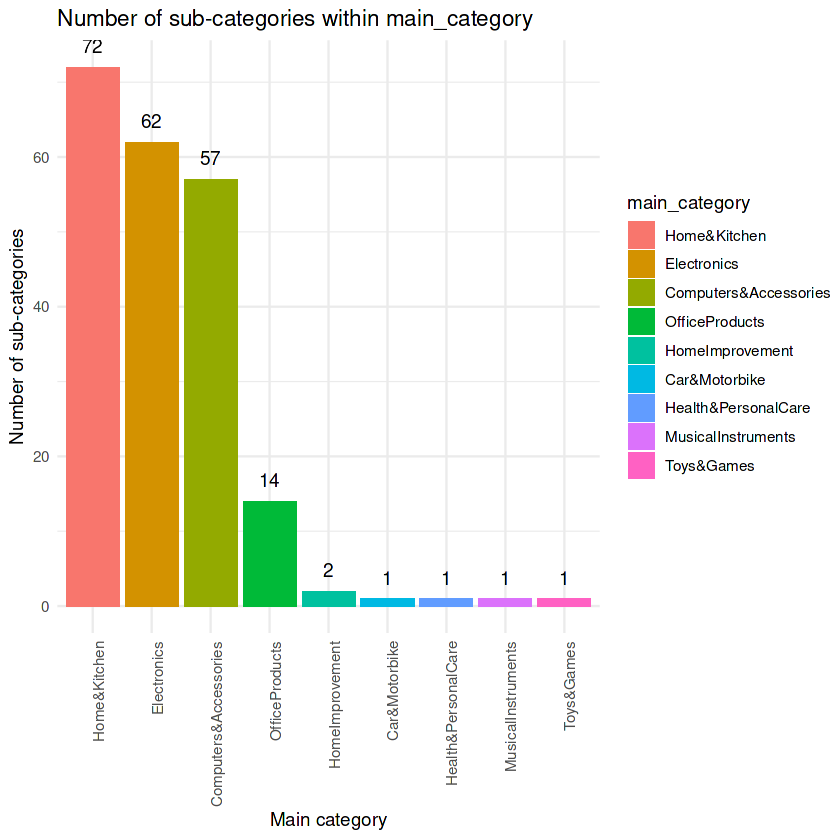

In [13]:
# number of sub category for every category
amazon_sales_data_v1%>%
group_by(main_category)%>%
summarize(number_of_subCategories = n_distinct(category))%>%
arrange(desc(number_of_subCategories))%>%
mutate(main_category = factor(main_category, levels = main_category))%>%
ggplot(aes(main_category, number_of_subCategories))+
geom_bar(stat = "identity", aes(fill = main_category))+
geom_text(aes(label = number_of_subCategories, vjust = -1))+
labs(title = "Number of sub-categories within main_category",
    x = "Main category",
    y = "Number of sub-categories")+
theme_minimal()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))


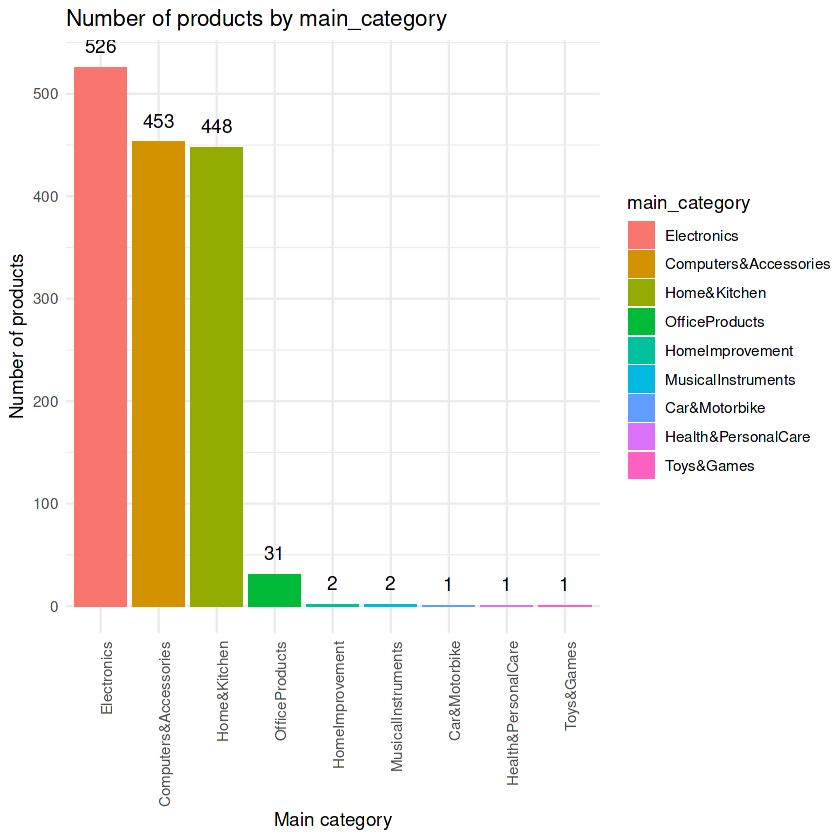

In [14]:
# number of products for every category
amazon_sales_data_v1 %>%
group_by(main_category)%>%
summarize(count_by_mainCategory = n())%>%
arrange(desc(count_by_mainCategory))%>%
mutate(main_category = factor(main_category, levels = main_category))%>%
ggplot(aes(main_category, count_by_mainCategory))+
geom_bar(stat = "identity", aes(fill = main_category))+
geom_text(aes(label = count_by_mainCategory, vjust = -1))+
labs(title = "Number of products by main_category",
    x = "Main category",
    y = "Number of products")+
theme_minimal()+
theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [15]:
# Statistical analysis of data for discounted_price column
# For discounted_priced column
print("for discounted price")
amazon_sales_data_v1 %>%
  group_by(discounted_price) %>%
  summarize(product_names = toString(product_name)) %>%
  summarize(least_priced_product = min(discounted_price),
            least_priced_product_names = toString(product_names[discounted_price == min(discounted_price)]),
            highest_priced_product = max(discounted_price),
            highest_priced_product_names = toString(product_names[discounted_price == max(discounted_price)]))

# For actual_price column
print("for actual price")
amazon_sales_data_v1 %>%
  group_by(actual_price) %>%
  summarize(product_names = toString(product_name)) %>%
  summarize(least_priced_product = min(actual_price),
            least_priced_product_names = toString(product_names[actual_price == min(actual_price)]),
            highest_priced_product = max(actual_price),
            highest_priced_product_names = toString(product_names[actual_price == max(actual_price)]))


[1] "for discounted price"


least_priced_product,least_priced_product_names,highest_priced_product,highest_priced_product_names
<dbl>,<chr>,<dbl>,<chr>
39,"GIZGA essentials Universal Silicone Keyboard Protector Skin for 15.6-inches Laptop (5 x 6 x 3 inches), E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1), Inventis 5V 1.2W Portable Flexible USB LED Light Lamp (Colors may vary)",77990,Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)


[1] "for actual price"


least_priced_product,least_priced_product_names,highest_priced_product,highest_priced_product_names
<dbl>,<chr>,<dbl>,<chr>
39,"E-COSMOS 5V 1.2W Portable Flexible USB LED Light (Colours May Vary, Small, EC-POF1), Inventis 5V 1.2W Portable Flexible USB LED Light Lamp (Colors may vary)",139900,Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black)


# Analyzing product performance

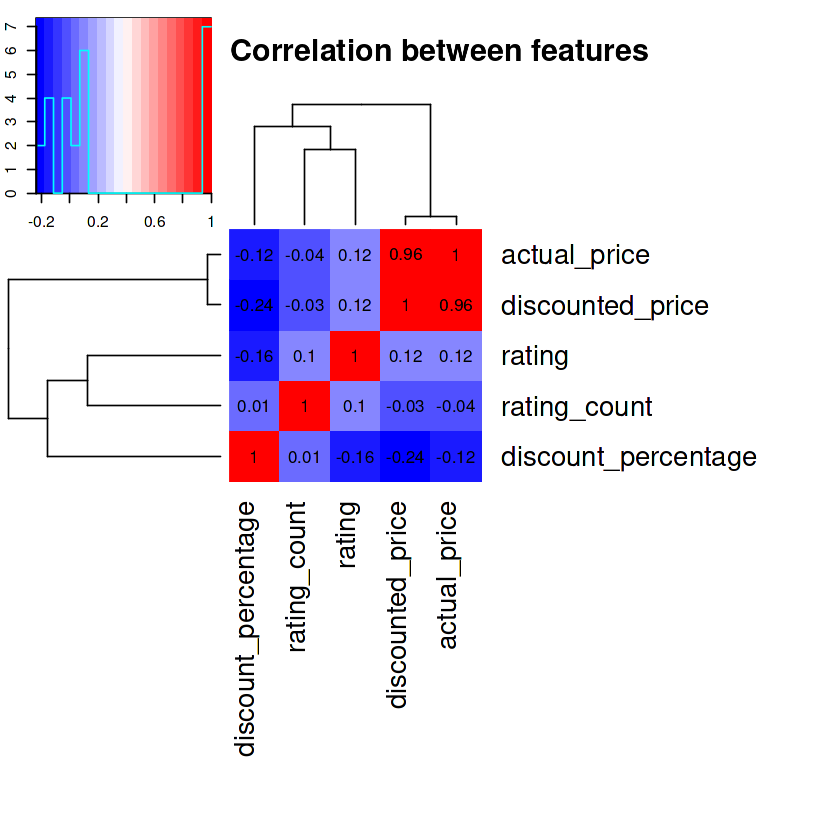

In [16]:
# correlation analysis of all quantitative fields columns

numeric_data <- amazon_sales_data_v2 %>%
  select_if(is.numeric)

# Compute the correlation matrix
correlation_matrix <- cor(numeric_data)

# Round correlation values to 2 decimal places
rounded_correlation <- round(correlation_matrix, 2)

# Using heatmap.2 from gplots
heatmap.2(rounded_correlation, 
          main = "                    Correlation between features", 
          col = colorRampPalette(c("blue", "white", "red"))(20),
          margins = c(18, 18),  # Adjust the margins for better spacing
          cex.axis = 0.8,     # Adjust the size of axis labels
          las = 2,            # Rotate axis labels
          trace = "none",     # Disable trace colors
          symkey = FALSE,     # Do not display the symbol key
          key.title = NA,     # Remove the key title
          key.xlab = NA,      # Remove the key x-axis label
          key.ylab = NA,      # Remove the key y-axis label
          cellnote = rounded_correlation,  # Display rounded correlation values
          notecol = "black",  # Set the color of the correlation values
          symbreaks = FALSE)  # Do not use symbolic breaks

### Analysis
* In correlation analysis, the closer a value is to 1 or -1, the stronger the correlation. In the given data, only the correlation between discounted price and actual price exhibits a robust correlation, with all other fields falling within the range of -0.24 and 0.12.
* The correlation coefficient between discounted price and actual price is 0.96, very strong positive correlation between these two variables.
* it can be concluded that the only notable correlation exists between higher actual prices and higher discounted prices, and vice versa. Apart from this relationship, there is no other considerable impact or influence of one variable's movement on the movement of other variables in the dataset.

highest_rating,lowest_rating,average_rating
<dbl>,<dbl>,<dbl>
5,2,4.096519


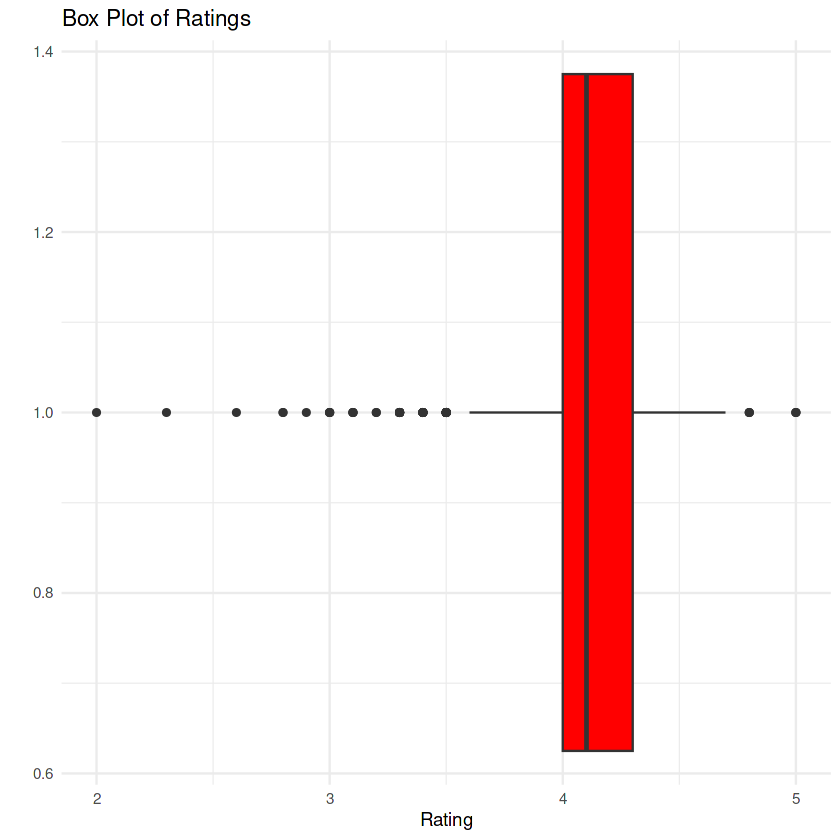

In [17]:
# analyzing product ratings
amazon_sales_data_v1 %>%
summarize(highest_rating = max(rating),
         lowest_rating = min(rating),
         average_rating = mean(rating))

amazon_sales_data_v1 %>%
  ggplot(aes(x = rating, y = 1)) +
  geom_boxplot(fill = "red") +
  labs(title = "Box Plot of Ratings",
       x = "Rating",
       y = "") +
  theme_minimal()

### Analysis
* The average rating for all the products stands at 4.09 with top 25% to 75% rated products falling in the range of 4.00 to 4.30 which is represented by the box filled with red colour and the bold black line in the box represents median value.
* The whiskers extended from the box plot along with the points represent the top 25% and bottom 25% rated products where the points represent outliers.
* When checking the outliers we find that while for top 25% there are only 2 outliers but in case of bottom 25% there are quite a few outliers. 

### Studying outliers to gain greater insights

In [18]:
# checking outliers
# filtering products with rating of more than 4.75
print("higher rated outliers")
upper_outliers <- amazon_sales_data_v1 %>%
filter(rating > 4.75)
print(upper_outliers)

[1] "higher rated outliers"
  product_id
1 B0BP7XLX48
2 B0BQRJ3C47
3 B09ZHCJDP1
4 B0BR4F878Q
5 B0BQ3K23Y1
6 B0B53DS4TF
                                                                                                                                                                                                                                                                  product_name
1                                                                                              Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)
2                                                                                REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
3                                                                   

### Analysis
* There are 6 products which have rating of greater than 4.75 and all these products belong to only 2 main categories namely Computers&Accessories and Home&Kitchen accounting for 3 each.
* When analysed further we find that all three products of Computers&Accessories are rated 5 and two which are fast charging USB cables that belong to same category Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables.
* On checking the review title column, it is found that common keyword for Computers&Accessories was quality of product and for Home&Kitchen it was ease of use.


Note: Of the three products from Computers&Accessories having rating of 5, specifically belonging to category Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables is the one with missing 'rating_count' whose webpage is not working.

In [19]:
# Checking outliers
# filtering products with rating of less than 3
print("lower rated outliers")
lower_outliers <- amazon_sales_data_v1 %>%
filter(rating < 3.00)
print(lower_outliers)

[1] "lower rated outliers"
  product_id
1 B0BBVKRP7B
2 B0BFBNXS94
3 B0BNDGL26T
4 B0BPJBTB3F
5 B0B7L86YCB
6 B0BBLHTRM9
                                                                                                                                                                             product_name
1                                                                                      SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black)
2                              Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)
3                          MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)
4                                                                                                                                   Khaita

### Analysis
* There are 6 products which have rating of below 3.00, out of these six, five belong to Home&Kitchen.
* On checking the review title column, it is found that common issues were related to poor product quality, low battery life and product being defective.

# Category wise analysis

In [20]:
# digging deeper
# number of products for every category
amazon_sales_data_v1%>%
group_by(category)%>%
summarize(number_of_products = n())%>%
arrange(desc(number_of_products))

category,number_of_products
<chr>,<int>
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24


### Analysis
* While main category wise electronics have the highest number of products, sub category wise Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables category of Computers&Accessories has highest number of products accounting for over 50% of the total products under Computers&Accessories.


In [21]:
# Calculating number of categories with one product
categories_with_1product<- amazon_sales_data_v2%>%
group_by(category)%>%
summarize(number_of_products = n())%>%
filter(number_of_products == 1)

number_of_categories_with_1product<- nrow(categories_with_1product)
paste("number of categories with only one product:",number_of_categories_with_1product)

# Calculating average rating for categories with 1 product
average_rating_categories_with_1product <- amazon_sales_data_v2 %>%
  group_by(category) %>%
  summarize(number_of_products = n(),
            average_rating = mean(rating),
           average_rating_count = mean(rating_count)) %>%
  filter(number_of_products == 1)

average_rating_1product_categories<- average_rating_categories_with_1product%>%
summarize(mean_rating = mean(average_rating))
paste("average rating for categories with only 1 product:",average_rating_1product_categories)

# Calculating average rating categories with more than 1 product
average_rating_categories_with_moreThan_1product<- amazon_sales_data_v2%>%
group_by(category)%>%
summarize(num_of_products = n(),
          avg_rating = mean(rating))%>%
filter(num_of_products > 1)
average_rating_higher1product_categories<- average_rating_categories_with_moreThan_1product%>%
summarize(avg_rating1 = mean(avg_rating))
paste("average rating for categories with more than 1 product:", average_rating_higher1product_categories)

# Calculating average rating count for categories with 1 product
average_ratingCount_1product_categories<- average_rating_categories_with_1product%>%
summarize(mean_rating_count = mean(average_rating_count))
paste("average rating count for categories with only 1 product:",average_ratingCount_1product_categories)

# Calculating average rating count for categories with more than 1 product
categories_with_moreThan_1product<- amazon_sales_data_v2%>%
group_by(category)%>%
summarize(num_of_products = n(),
          avg_rating_count = mean(rating_count))%>%
filter(num_of_products > 1)
average_ratingCount_higher1product_categories<- categories_with_moreThan_1product%>%
summarize(avg_rating_count1 = mean(avg_rating_count))
paste("average rating count for categories with more than 1 product:", average_ratingCount_higher1product_categories)

[1] "number of categories with only one product: 75"

[1] "average rating for categories with only 1 product: 4.17466666666667"

[1] "average rating for categories with more than 1 product: 4.10522752712569"

[1] "average rating count for categories with only 1 product: 13556.7733333333"

[1] "average rating count for categories with more than 1 product: 13443.3466092943"

### Analysis
* Of the total of 211 categories, 75 have only one product accounting for almost a third of total categories and they have an average rating of 4.17 which is higher than for average rating for categories with more than 1 product which stands at 4.105.
* On an average number of people who have rated these products are 13556.77 for every product which is higher than average rating count for categories with more than 1 product of 13443.34  

main_category,average_rating
<chr>,<dbl>
OfficeProducts,4.309677
Toys&Games,4.300000
HomeImprovement,4.250000
Computers&Accessories,4.154967
Electronics,4.081749
Home&Kitchen,4.040625
Health&PersonalCare,4.000000
MusicalInstruments,3.900000
Car&Motorbike,3.800000


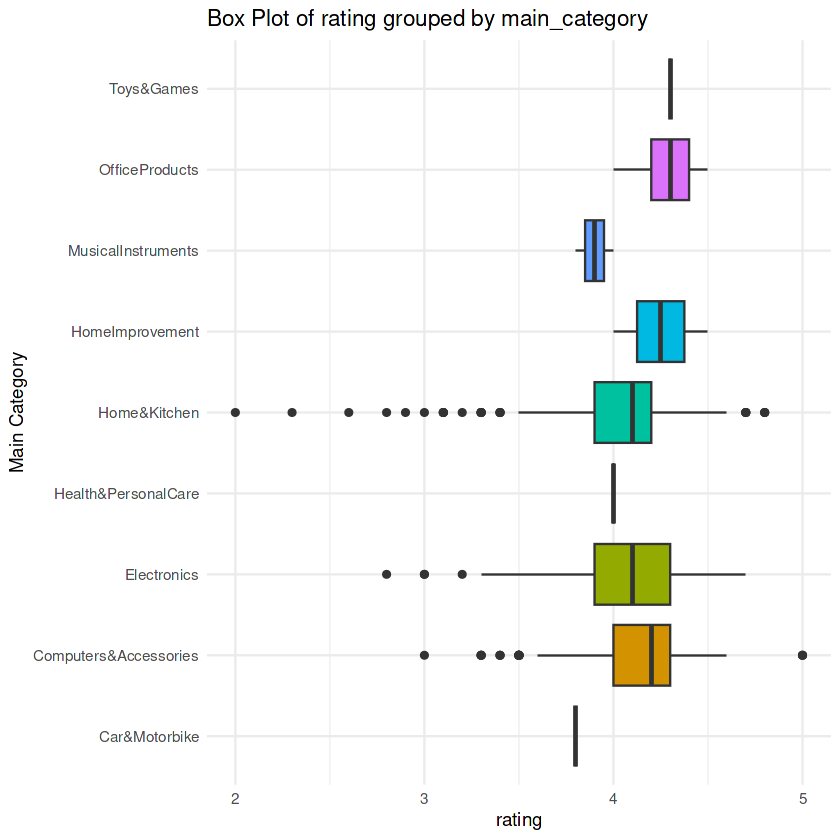

In [22]:
# analysis of rating column
# average rating by main category
amazon_sales_data_v1 %>%
group_by(main_category) %>%
summarize(average_rating = mean(rating)) %>%
arrange(desc(average_rating))

# complete range of rating
amazon_sales_data_v1 %>%
  ggplot(aes(x = rating, y = main_category, fill = main_category)) +
  geom_boxplot() +
    labs(title = "Box Plot of rating grouped by main_category",
       x = "rating",
       y = "Main Category") +
  theme_minimal() +
  theme(legend.position = "none")

### Analysis
* Of all the the main categories OfficeProducts has the higest average rating of 4.3 while Car&Motorbike has the lowest of 3.8.
* Car&Motorbike and MusicalInstruments are the only two categories with rating of lower than 4.
* Of all the main categories Home&Kitchen have the highest number of outliers in rating and most of them lie in the lower quadrant dragging its rating down to 4.04

average_rating_count
<dbl>
18283.08


main_category,average_rating_count
<chr>,<dbl>
MusicalInstruments,44441.000
Electronics,29997.810
Computers&Accessories,17098.976
Toys&Games,15867.000
Home&Kitchen,6676.493
OfficeProducts,4828.226
HomeImprovement,4283.000
Health&PersonalCare,3663.000
Car&Motorbike,1118.000


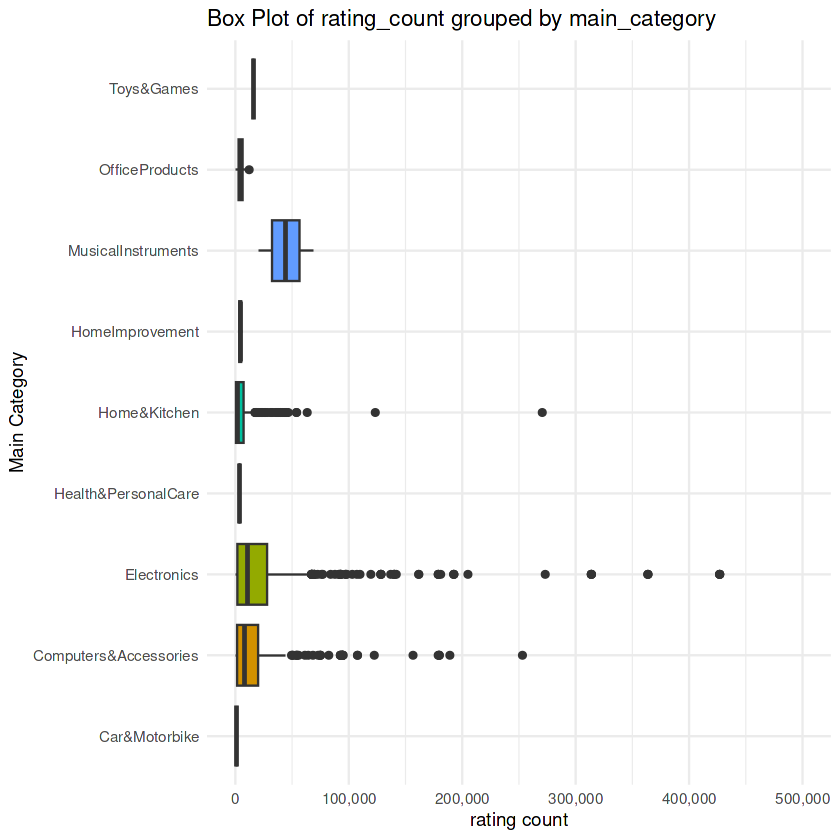

In [23]:
# Analysing rating_count column
# Calculating average rating_count
amazon_sales_data_v2 %>%
summarize(average_rating_count = mean(rating_count))

#Average rating_count by category
amazon_sales_data_v2 %>%
group_by(main_category) %>%
summarize(average_rating_count = mean(rating_count)) %>%
arrange(desc(average_rating_count))

# complete range of rating_count
amazon_sales_data_v2 %>%
  ggplot(aes(x = rating_count, y = main_category, fill = main_category)) +
  geom_boxplot() +
    labs(title = "Box Plot of rating_count grouped by main_category",
       x = "rating count",
       y = "Main Category") +
  theme_minimal() +
  theme(legend.position = "none")+
  scale_x_continuous(limits = c(0,500000), breaks = seq(0,500000,by = 100000),
                     labels = scales::comma_format())
  

### Analysis
* The average rating count for all the products stand at 18283.
* When categorized by main category, Musical Instruments have the highest average rating count of 44441, while Car & Motorbike have the lowest of 1118.
* On observing the box what is very prominant is that for the main categories that have outliers all the outliers belongs to top 25% quadrant which means that in most cases higher average rating count is due to these outliers.

In [24]:
# Checking rating count for categories with only 1 product
rating_count_1product <- amazon_sales_data_v2 %>%
  group_by(category) %>%
  summarize(number_of_products = n(),
            mean_rating_count = mean(rating_count),
           mean_rating = mean(rating)) %>%
  filter(number_of_products == 1)%>%
  arrange(desc(mean_rating_count))
print(rating_count_1product)

# Calculating number of products with rating count higher than average rating count for all the products of 18283
above_average_rating_count <- rating_count_1product %>%
filter(mean_rating_count > 18283.08)
paste("number of categories with 1 product and rating count of higher than average rating count:",
      nrow(above_average_rating_count))

# A tibble: 75 × 4
   category                     number_of_products mean_rating_count mean_rating
   <chr>                                     <int>             <dbl>       <dbl>
 1 Home&Kitchen|Kitchen&Dining…                  1            270563         4.1
 2 Computers&Accessories|Netwo…                  1             95116         4.3
 3 Electronics|Accessories|Mem…                  1             69585         4.4
 4 Computers&Accessories|Exter…                  1             41398         4.4
 5 Electronics|Cameras&Photogr…                  1             40895         3.8
 6 Computers&Accessories|Compo…                  1             26194         4.5
 7 Computers&Accessories|Acces…                  1             25607         4.1
 8 Computers&Accessories|Acces…                  1             25177         4.4
 9 Electronics|Cameras&Photogr…                  1             24432         4.2
10 Computers&Accessories|Netwo…                  1             22420         4.5
# ℹ 65 mo

[1] "number of categories with 1 product and rating count of higher than average rating count: 12"

### Analysis
* Average rating count for categories with only 1 product is 13556.77, which is lower than the average rating count for main categories that stands at 18283.08.
* When analysed deeper 12 such categories have rating count higher than average rating count for main categories which stands at 18283.08. 

main_category,highest_discount_percentage,lowest_discount_percentage,average_discount_percentage
<chr>,<dbl>,<dbl>,<dbl>
HomeImprovement,58,57,57.50000
Computers&Accessories,94,0,54.02428
Health&PersonalCare,53,53,53.00000
Electronics,91,0,50.82890
MusicalInstruments,60,32,46.00000
Car&Motorbike,42,42,42.00000
Home&Kitchen,90,0,40.12054
OfficeProducts,75,0,12.35484
Toys&Games,0,0,0.00000


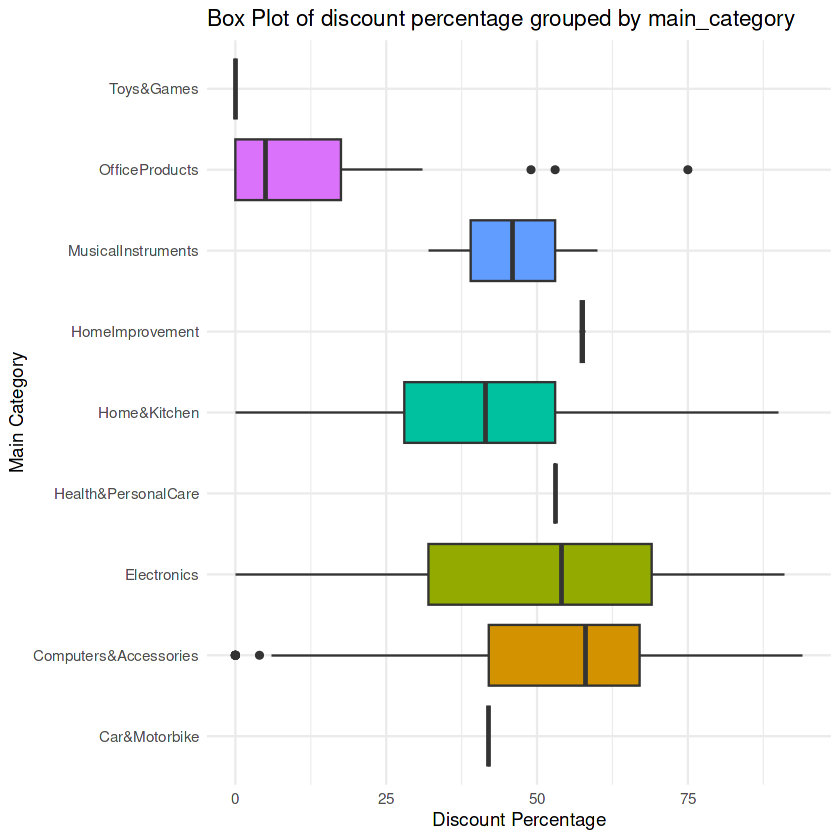

In [25]:
# statistical analysis of discount_percentage column
amazon_sales_data_v1 %>%
group_by(main_category)%>%
summarize(highest_discount_percentage = max(discount_percentage),
         lowest_discount_percentage = min(discount_percentage),
         average_discount_percentage = mean(discount_percentage))%>%
arrange(desc(average_discount_percentage))

amazon_sales_data_v1 %>%
  ggplot(aes(x = discount_percentage, y = main_category, fill = main_category)) +
  geom_boxplot() +
    labs(title = "Box Plot of discount percentage grouped by main_category",
       x = "Discount Percentage",
       y = "Main Category") +
  theme_minimal() +
  theme(legend.position = "none")

### Analysis
* HomeImprovement has the highest average discount percentage while it is lowest for Toys&Games.

# Text Analysis

### Finding top keywords used by customers in review title.

In [26]:
# creating a new data frame tokenising and pre processing review_title
review_title_keywords <- amazon_sales_data_v1 %>%
  unnest_tokens(keyword, review_title, token = "words")

# Load the stop words data
stop_words <- data.frame(keyword = stop_words)
str(stop_words)

'data.frame':	1149 obs. of  2 variables:
 $ keyword.word   : chr  "a" "a's" "able" "about" ...
 $ keyword.lexicon: chr  "SMART" "SMART" "SMART" "SMART" ...


In [27]:
# Correct the column names
colnames(stop_words) <- c("keyword", "lexicon")
str(stop_words)

'data.frame':	1149 obs. of  2 variables:
 $ keyword: chr  "a" "a's" "able" "about" ...
 $ lexicon: chr  "SMART" "SMART" "SMART" "SMART" ...


In [28]:
# removing stop words from review_title column
filtered_data <- anti_join(review_title_keywords, stop_words, by = "keyword")

# Group by category and count keyword frequencies
keyword_counts <- filtered_data %>%
  group_by(keyword) %>%
  summarise(n = n()) %>%
  arrange(desc(n))

head(keyword_counts,20)

keyword,n
<chr>,<int>
product,2420
nice,894
quality,761
money,574
price,474
cable,332
worth,317
buy,257
easy,229


### Analysis
* The most used keyowrds used by the customers in addition to words like product, tv, watch etc. are words like quality, price, money, worth, buy, easy.
* It helps us understand the common themes for customers like product quality, price, ease of use.

### Identifying the top keywords in review titles for each category to understand customer preferences and expectations.

In [29]:
# finding top 10 keywords in review_title for every main_category
#factoring main_category
filtered_data$main_category<- factor(filtered_data$main_category,
                                      levels = c("Computers&Accessories", "Electronics","Home&Kitchen",
                                                 "OfficeProducts", "MusicalInstruments", "HomeImprovement",
                                                 "Toys&Games", "Car&Motorbike", "Health&PersonalCare" ))
# Group by category and keyword, count keyword frequencies
keywords_count <- filtered_data %>%
  group_by(main_category, keyword) %>%
  summarise(n = n()) %>%
  arrange(main_category, desc(n))

# Rank the keywords within each category
top_keywords_count <- keywords_count %>%
  group_by(main_category) %>%
  mutate(rank = row_number()) %>%
  filter(rank <= 10)  # Keep only the top 5 keywords for each category
  
# Display the top 10 keywords for every category
head(top_keywords_count,60)

`summarise()` has grouped output by 'main_category'. You can override using the
`.groups` argument.


main_category,keyword,n,rank
<fct>,<chr>,<int>,<int>
Computers&Accessories,product,706,1
Computers&Accessories,cable,287,2
Computers&Accessories,nice,277,3
Computers&Accessories,quality,273,4
Computers&Accessories,charging,202,5
Computers&Accessories,price,159,6
Computers&Accessories,money,152,7
Computers&Accessories,fast,114,8
Computers&Accessories,worth,100,9


### Analysis
* When words are segregated by main category there are few additional keywords by category that stand out like fast and charging for Computers&Accessories or beginners in MusicalInstruments and durability in HomeImprovement.

# Key takeaways
* The Home & Kitchen category exhibits a dual pattern, with three of the top six rated products and five of the six least rated products falling within this category. However, it is noteworthy that many outliers in this category lie in the bottom 25% quadrant of its rating box plot which contribute to an overall rating that is below the average rating for main categories.

* In more than a third of the categories, only one product is listed. These individual products boast an average rating higher than the overall average rating for both category and sub-category. Additionally, their average rating count surpasses the overall average rating count by category.

* Upon reviewing the review titles, key and pertinent keywords emerge, providing insights into customers' preferences and expectations. Across all categories, the prominent terms include quality, money, price, easy, use, worth, and buy. Upon closer examination within each main category, specific terms gain prominence. For instance, "fast charging" surfaces for Computer & Accessories, "beginners" for Musical Instruments, "durability" for Home Improvement, and "easy to use" for Home & Kitchen.

# Top Recommendations
### For Business Performance
Given the significant importance of the Home & Kitchen category, accounting for approximately 30% of the total products, it is crucial to address customer preferences. Users in this category prioritize products that are both easy to use and of good quality. However, there are complaints about poor product quality and defects which are affecting the ratings of products in this category. It is imperative to promptly address and resolve these issues, as their persistence could have a detrimental impact on the business through the platform. Prioritizing quality and addressing customer concerns will contribute to the overall satisfaction and success of the Home & Kitchen category.

### For Business Growth
In more than a third of the categories, only a single product is featured, presenting a noteworthy opportunity for expansion. These categories exhibit a higher average rating and rating count compared to the overall averages by category. Leveraging this, the top 12 products with the highest rating counts become key focal points. All these products surpass the average rating count by main category, which stands at over 18,000—significantly higher than the category-level rating count. By analyzing the reviews associated with these top products, valuable insights into customer preferences can be gained. Incorporating products that align with these preferences holds the potential to enhance positive responses and overall customer satisfaction.

### Customer Preferences
Text analysis of review titles has provided valuable insights into customer preferences and expectations with use of terms like quality, money, price, easy, use, worth, and buy, which are consistently prominent across all categories, indicating universal customer priorities.
Upon closer examination category-specific terms like "fast charging" is crucial for Computer & Accessories, "beginners" for Musical Instruments, "durability" for Home Improvement, and "easy to use" for Home & Kitchen are very prominent. A specific category centric study of review titles and review content can lead to more effective product development, marketing, and overall customer satisfaction.

# Scope of further analysis
Conducting a focused study that digs into the quantity sold for each product and the corresponding rating count could be helpful. This investigation aims to discover the correlation between the number of customers who make a purchase and those who subsequently provide ratings. The significance of a high rating count lies in its ability to convey to potential customers that the product they are interested in is actively being purchased and positively evaluated on Amazon's platform. This, in turn, heightens the likelihood of customers choosing to make their purchases through the Amazon platform.





